# Vivek

In [1]:
import numpy as np
from numpy.linalg import inv, norm
import matplotlib.pyplot as plt

np.random.seed(0)

The default parameter setting

In [2]:
## parameters
p = 100
n_1 = 200
n_2 = 200

epochs = 500
lr = 0.001

## Implement the transfer learning task

First, generate the parameters $\beta_1$, and $\beta_2=\beta_1+\delta\cdot \mathcal{N}(0,1)$. Then the features $X_1,X_2$ from the standard normal distribution $\mathcal{N}(0,1)$

Also generate the error terms $\varepsilon_1,\varepsilon_2$ from $\sigma_i\cdot\mathcal{N}(0,1)$, and $Y_1,Y_2$ from $Y_i=X_i\beta_i+\varepsilon_i$

In [3]:
def generate_params(p, n_1, n_2, sigma_1, sigma_2, delta):
    
    # GENERATE DATA HERE ####
    
    # task 1
    beta_1 = np.random.normal(0, 1, (p, 1))

    X_1 = np.random.normal(0, 1, (n_1, p))
    epsilon_1 = sigma_1 * np.random.normal(0, 1, (n_1, 1))
    Y_1 = X_1 @ beta_1 + epsilon_1

    # task 2
    beta_2 = beta_1 + delta * np.random.normal(0, 1, (p, 1))
    
    X_2 = np.random.normal(0, 1, (n_2, p))
    epsilon_2 = sigma_2 * np.random.normal(0, 1, (n_2, 1))
    Y_2 = X_2 @ beta_2 + epsilon_2
    
    ######################
    
    return (X_1, Y_1, X_2, Y_2, beta_2)

Implement gradient descent, using $w_0=\hat{\beta}_1 = (X_1^{\top}X_1)^{-1}X_1^{\top}Y_1$ as initialization. Save the loss for each step, defined by $\|w_t-\beta_2\|^2$.

In [7]:
def gradient_descent(params, epochs, lr):
    
    # unpack features, labels, parameters
    X_1, Y_1, X_2, Y_2, beta_2 = params
    list_dist = []
    
    # YOUR CODE HERE ####
    beta1 = np.matmul(np.linalg.inv(np.transpose(X_1).dot(X_1)), np.transpose(X_1).dot(Y_1))

    for epoch in range(epochs):
        error = X_2.dot(beta1)-Y_2
        grad = np.dot(np.transpose(X_2), (X_2.dot(beta1) - Y_2))/X_1.shape[0]    
        beta1 = beta1 - lr*grad
        list_dist.append(norm(beta1 - beta_2))

    
    #####################
    
    return list_dist

## Plot $\|w_t-\beta_2\|^2$ versus $t$.

In [5]:
def plot_dist(list_dist):
    # plot
    plt.xlabel('Epochs')
    plt.ylabel('Distance to real parameters')
    plt.grid(lw=0.4)
    plt.yscale('log')
    plt.plot(np.arange(len(list_dist)), list_dist)
    plt.show()

## Try different sets of parameters. Observe the shapes for the loss curve

Refer to the problem description for suggested parameter settings

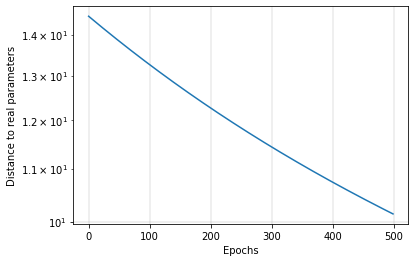

In [8]:
params = generate_params(p=100, n_1=200, n_2=200, sigma_1 = 0.1, sigma_2 = 0.1, delta = 1.5)
dist = gradient_descent(params, epochs, lr)
plot_dist(dist)

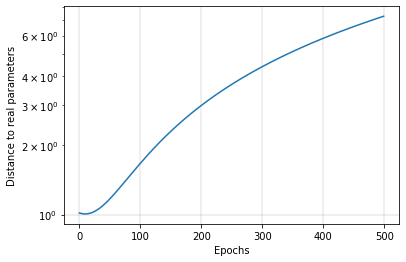

In [91]:
params = generate_params(p=100, n_1=200, n_2=200, sigma_1 = 0.1, sigma_2 = 0.3, delta = 0.1)
dist = gradient_descent(params, epochs, lr)
plot_dist(dist)

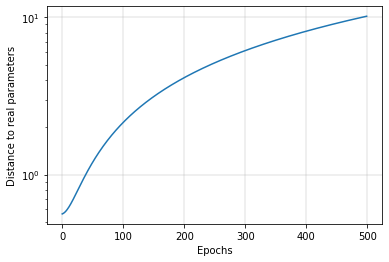

In [92]:
params = generate_params(p=100, n_1=200, n_2=200, sigma_1 = 0.1, sigma_2 = 0.3, delta = 0.05)
dist = gradient_descent(params, epochs, lr)
plot_dist(dist)